In [1]:
#Importing libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
cdata = pd.read_excel('data/CCPP.xlsx')

cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [2]:
print(cdata.shape)
cdata.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
cdata.describe(include ="all")

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
cdata.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

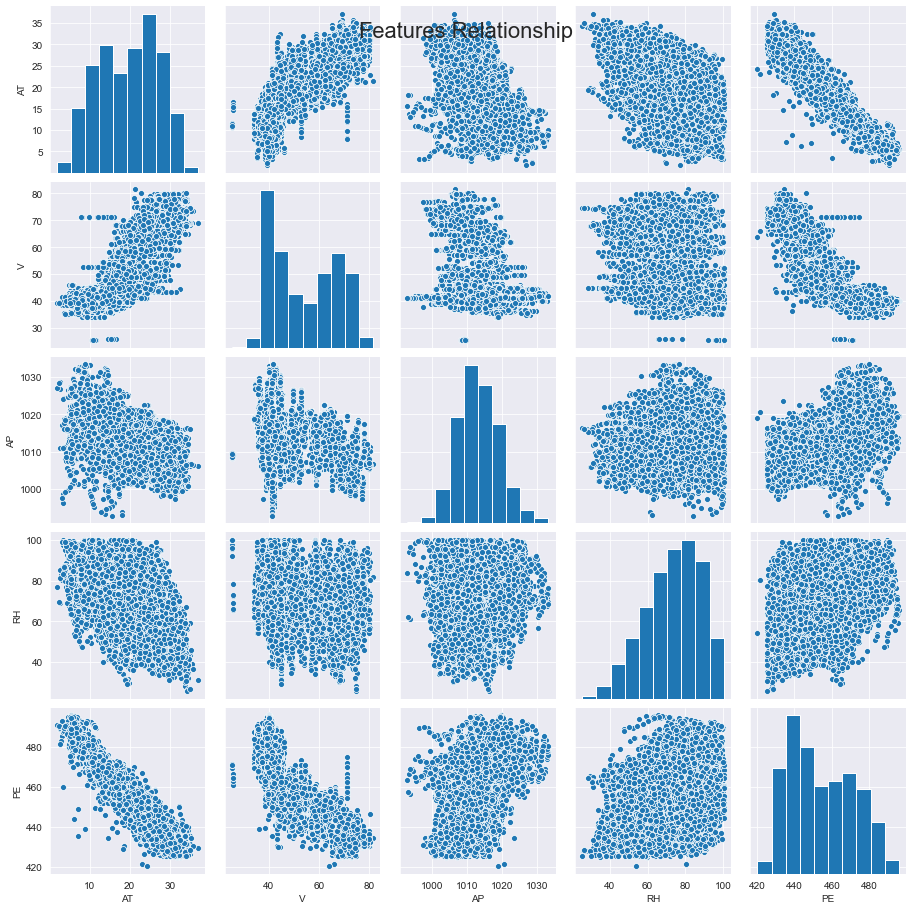

In [5]:
sns.set_style(style="darkgrid")
sns.pairplot(cdata, 
             vars = cdata.columns.tolist())

plt.suptitle('Features Relationship', size = 22);
plt.show()

In [6]:
col = cdata.columns.tolist()
col[0:5]

['AT', 'V', 'AP', 'RH', 'PE']

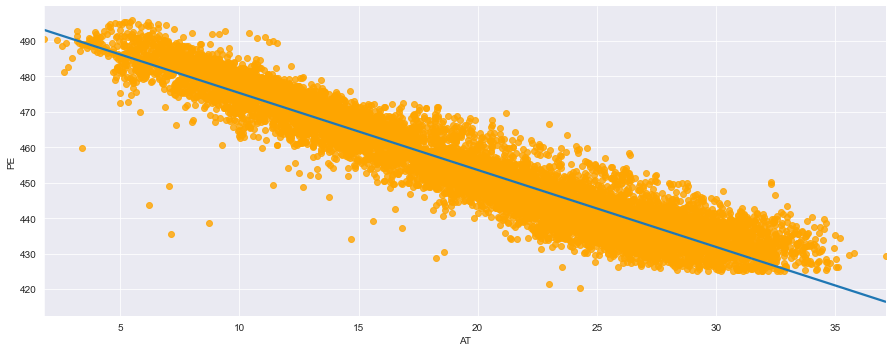

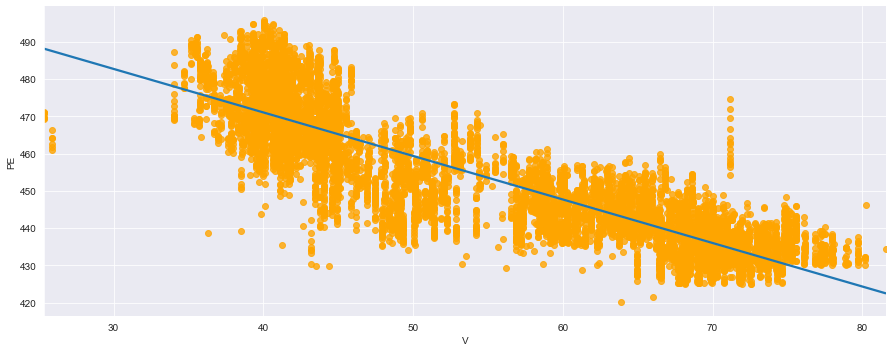

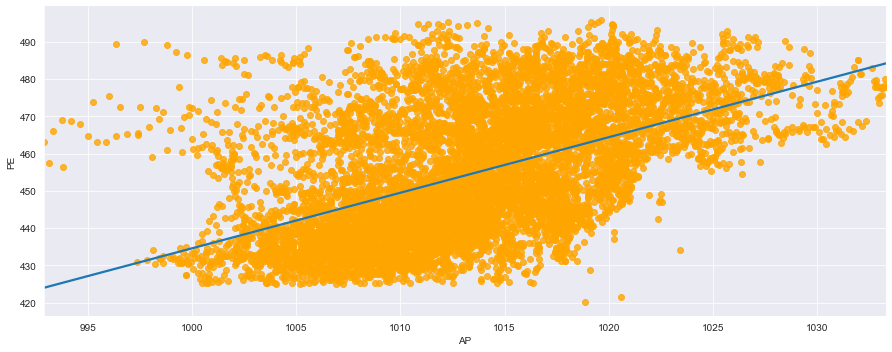

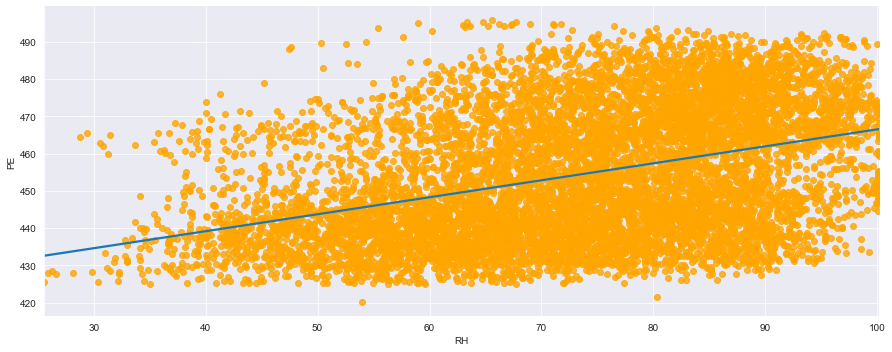

In [7]:
for i in col[0:4]:
    g = sns.lmplot(x=i , y= 'PE', data = cdata, height=5, 
                   aspect=2.5, scatter_kws={"color": 'orange'}, ci= False)
  

In [8]:
# Variables correlation

cdata.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


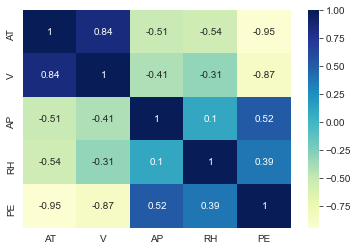

In [9]:
# Heatmap correlation
ht = sns.heatmap(cdata.corr(),center=0, annot=True, cmap="YlGnBu")

In [10]:
# Spilting data independent variables and dependent variables 
X = cdata.drop(['PE'], axis=1)
y = cdata.PE

In [11]:
# P-Values
# Ordinary Least Squares and Importing Statsmodels Package
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:39:27   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [12]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:39:28   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [13]:
print("Variable Name :",lr.pvalues.idxmax())
print("Variable = ",lr.pvalues.max())

Variable Name : AP
Variable =  5.5071088524993335e-11


In [14]:
lr.pvalues

const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64

In [15]:
#Split the data into training 80% and testing 20% sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,
                                                   test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [16]:
# Linear Regression model and fitting the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Model Test Accuracy Score: ", model.score(X_test,y_test))
print("Model Train Accuracy Score: ", model.score(X_train,y_train))

Model Test Accuracy Score:  0.9325315554761302
Model Train Accuracy Score:  0.9277253998587902


In [18]:
model.intercept_ #b0

452.84103716163776

In [19]:
model.coef_ #(m1,m2,m3,m4,.....)

array([-1.97313099, -0.23649993,  0.06387891, -0.15807019])

In [20]:
# Y Predict 
y_pred = model.predict(X_test)

In [21]:
# Check the mean squared error between the predicted and true values on the test set

from sklearn.metrics import r2_score,mean_squared_error
import math

print("R Squared(R^2): ", r2_score(y_test,y_pred)) #R^2
print("Mean Squared Error(MSE): ", mean_squared_error(y_test,y_pred)) #MSE
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

R Squared(R^2):  0.9325315554761302
Mean Squared Error(MSE):  19.73369930349765
Root Mean Squared Error (RMSE):  4.442262858442491


In [22]:
# Adjusted R Squared (R2)
n = len(X_test)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print("Adjusted R2: ", Adj_R2)

Adjusted R2:  0.9323901862890713


In [23]:
# K-fold Cross validation
from sklearn.model_selection import cross_val_score
print("K-fold cross validation :" , cross_val_score(LinearRegression(),X,y,cv=4).mean())
#print("K-fold cross validation (train):" , cross_val_score(LinearRegression(),X_train,y_train,cv=4).mean())
cvs_lnr = cross_val_score(LinearRegression(),X,y,cv=4).mean()

K-fold cross validation : 0.9286022473864548


In [24]:
y_test.shape

(1914,)

In [25]:
# Visulize Linear Regression modeltesting 
test=y_test.values.reshape(1,1914)
datatest = pd.DataFrame({"Actual":test.flatten(), "Predicted":y_pred.flatten()})
datatest.head(11)

,Actual,Predicted
0,431.23,431.427616
1,460.01,458.561246
2,461.14,462.752647
3,445.90,448.595962
4,451.29,457.870777
5,432.68,429.693839
6,477.50,473.041853
7,459.68,456.508363
8,477.50,474.340491
9,444.99,446.343029


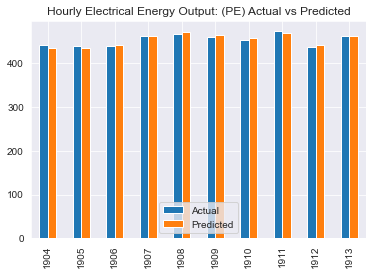

In [26]:
datatest.tail(10).plot(kind ="bar")
plt.title("Hourly Electrical Energy Output: (PE) Actual vs Predicted") 
plt.show()

In [27]:
# Grid Seaech CV
params = { "n_jobs": [1, 5, 10, 15] }

from sklearn.model_selection import GridSearchCV
grid_lnr = GridSearchCV(estimator=LinearRegression(), 
                       param_grid=params,
                       cv=4,
                        
                       scoring="accuracy"
                      )

In [28]:
grid_lnr.fit(X_train, y_train)

ValueError: continuous is not supported

In [ ]:
grid_lnr.best_params_

In [ ]:
print("Linear Regression Best Score:", grid_lnr.best_score_)

In [ ]:
# Linear Regression k-fold cross-validation score
from sklearn.model_selection import cross_val_score
print("Linear Regression K-fold cross validation:", cross_val_score(grid_lnr, X,y, cv=4).mean()) 

In [27]:
# KNN Model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [28]:
# for no.of nighbors from 1 -10, graph the k_fold scores
nighb = []
max = 0
k = 0

for i in range(1,16,1):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance')
    score = cross_val_score(knn, X, y, cv=4).mean()
    if max < score:
        max = score 
        k = i
    nighb.append(score)

print('The Optimal K :', k)    
nighb

The Optimal K : 7


[0.9278570994010462,
 0.9415964487881785,
 0.9462799950457154,
 0.9485892847930293,
 0.9494328692798186,
 0.9501293765220572,
 0.9502690089715831,
 0.9500072763083849,
 0.9497800555809164,
 0.9495737674007427,
 0.9493010348669653,
 0.9489040394780105,
 0.948644178754568,
 0.9483670422687198,
 0.948028250440295]

Text(0, 0.5, 'K-fold Scores')

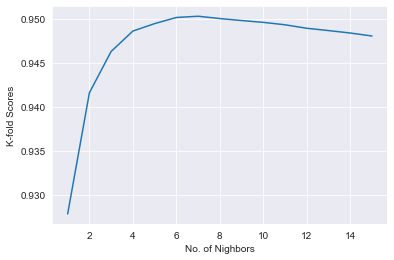

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1,16,1), nighb)
plt.xlabel('No. of Nighbors')
plt.ylabel('K-fold Scores')

In [30]:
knn.fit(X_train,y_train)
print("KNN Train Score :",knn.score(X_train,y_train))
print("KNN Test Score :",knn.score(X_test,y_test))

KNN Train Score : 1.0
KNN Test Score : 0.952585973183326


In [31]:
# KNN K-fold Cross validation
from sklearn.model_selection import cross_val_score
print("KNN K-fold cross validation:" , cross_val_score(knn,X,y,cv=4).mean())
cvs_knn = cross_val_score(knn,X,y,cv=4).mean()

KNN K-fold cross validation: 0.948028250440295


In [32]:
# Random forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV
params_rf = {'n_estimators': [80,100,120,140,160,180]}
rf = GridSearchCV(RandomForestRegressor(),param_grid=params_rf,cv=4)
rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [80, 100, 120, 140, 160, 180]})

In [33]:
rf.best_params_

{'n_estimators': 160}

In [34]:
print("Random Forest Best Score:", rf.best_score_)
print("Random Forest test Score:", rf.score(X_test, y_test))

Random Forest Best Score: 0.9577110506966866
Random Forest test Score: 0.964979484493635


In [35]:
# Random forest K-fold Cross validation
from sklearn.model_selection import cross_val_score
print("Random forest K-fold cross validation:" , cross_val_score(rf,X_train,y_train,cv=4).mean())
cvs_rf = cross_val_score(rf,X,y,cv=4).mean()

Random forest K-fold cross validation: 0.9576209764657849


In [36]:
# Adaboost Model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
params_ada = {
            'base_estimator': [
                               DecisionTreeRegressor(max_depth=10),
                               DecisionTreeRegressor(max_depth=12),
                               DecisionTreeRegressor(max_depth=14)
                              ],
            'n_estimators': [120,140,160,180,200]
            }
ada = GridSearchCV(AdaBoostRegressor(),param_grid=params_ada,cv=4)
ada.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=10),
                                            DecisionTreeRegressor(max_depth=12),
                                            DecisionTreeRegressor(max_depth=14)],
                         'n_estimators': [120, 140, 160, 180, 200]})

In [37]:
ada.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=12), 'n_estimators': 180}

In [38]:
print("AdaBoost Best Score:", ada.best_score_)
print("ABaBoost test Score:", ada.score(X_test, y_test))

AdaBoost Best Score: 0.9601980048674386
ABaBoost test Score: 0.9684527627145818


In [39]:
# AdaBoost K-fold Cross validation
from sklearn.model_selection import cross_val_score
print("AdaBoost K-fold cross validation:", cross_val_score(ada,X,y,cv=4).mean())
cvs_ada = cross_val_score(ada,X,y,cv=4).mean()

AdaBoost K-fold cross validation: 0.9627290391236357


In [40]:
# Support Vector Regression SVR model 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params_dictionary = {
                        'C' : [500, 1000, 1500],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3,4]
                        #'gamma' : [0.03, 0.3, 1.0]
                    }

svr_model = GridSearchCV(SVR(),param_grid=params_dictionary,cv=4)

In [41]:
svr_model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'C': [500, 1000, 1500], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [42]:
svr_model.best_params_

{'C': 1500, 'degree': 4, 'kernel': 'poly'}

In [43]:
svr_model.best_estimator_

SVR(C=1500, degree=4, kernel='poly')

In [44]:
print("SVR Best Score: ", svr_model.best_score_)
print("SVR test Score:", svr_model.score(X_test, y_test))

SVR Best Score:  0.9320940716055818
SVR test Score: 0.9368176216620794


In [45]:
# SVR K-fold Cross validation
from sklearn.model_selection import cross_val_score
print("SVR K-fold cross validation:", cross_val_score(svr_model,X,y,cv=4).mean())
cvs_svr = cross_val_score(svr_model,X,y,cv=4).mean()

SVR K-fold cross validation: 0.9332599537923512


In [48]:
# Visualize the all model scores

d = {
     'Test Score': [model.score(X_test,y_test), knn.score(X_test,y_test), rf.score(X_test, y_test), ada.score(X_test, y_test), svr_model.score(X_test, y_test)], 
     'Train Score': [model.score(X_train,y_train), knn.score(X_train,y_train), rf.best_score_, ada.best_score_, svr_model.best_score_], 
     'Cross Validation': [cvs_lnr, cvs_knn, cvs_rf, cvs_ada, cvs_svr]
    }
LNR_Model_Scores = pd.DataFrame(data=d)

LNR_Model_Scores.index = ['Linear Regression', 'KNN', 'Random Forest', 'AdaBoost', 'SVR'] 
LNR_Model_Scores

,Test Score,Train Score,Cross Validation
Linear Regression,0.932532,0.927725,0.928602
KNN,0.952586,1.000000,0.948028
Random Forest,0.964979,0.957711,0.961044
AdaBoost,0.968453,0.960198,0.961981
SVR,0.936818,0.932094,0.933260


In [49]:
LNR_Model_Scores.describe(include ="all")

,Test Score,Train Score,Cross Validation
count,5.000000,5.000000,5.000000
mean,0.951073,0.955546,0.946583
std,0.016161,0.028838,0.015404
min,0.932532,0.927725,0.928602
25%,0.936818,0.932094,0.933260
50%,0.952586,0.957711,0.948028
75%,0.964979,0.960198,0.961044
max,0.968453,1.000000,0.961981


In [53]:
LNR_Model_Scores['Average'] = LNR_Model_Scores.mean(numeric_only=True, axis=1)
LNR_Model_Scores

,Test Score,Train Score,Cross Validation,Average
Linear Regression,0.932532,0.927725,0.928602,0.930342
KNN,0.952586,1.000000,0.948028,0.975087
Random Forest,0.964979,0.957711,0.961044,0.962171
AdaBoost,0.968453,0.960198,0.961981,0.964761
SVR,0.936818,0.932094,0.933260,0.934742


In [99]:
print('Model Score Maximum Average :',LNR_Model_Scores.Average.idxmax(axis=0, skipna=True), 
      ' = ', LNR_Model_Scores.Average.max())

Model Score Maximum Average : KNN  =  0.9750872987216542


In [98]:
print('The Model Who Scored the Maximum:', '\n')

LNR_Model_Scores[['Test Score', 'Train Score', 'Cross Validation']].idxmax(axis=0, skipna=True)

The Model Who Scored the Maximum: 



Test Score          AdaBoost
Train Score              KNN
Cross Validation    AdaBoost
dtype: object

In [97]:
list = LNR_Model_Scores.idxmax(axis=0)
list.append(LNR_Model_Scores[['Test Score', 'Train Score', 'Cross Validation']].max())


Test Score          AdaBoost
Train Score              KNN
Cross Validation    AdaBoost
Average                  KNN
Test Score          0.968453
Train Score                1
Cross Validation    0.961981
dtype: object

In [74]:
print('Models Average Score:', LNR_Model_Scores.Average.mean())

Models Average Score: 0.953420627262316
